In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from statistics import mode
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [3]:
from collections import Counter

In [4]:
train = pd.read_csv('Titanic_Train.csv')
test = pd.read_csv('Titanic_Test.csv')

In [5]:
Id = test.PassengerId

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test.shape

(418, 11)

In [10]:
train.shape

(891, 12)

In [11]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

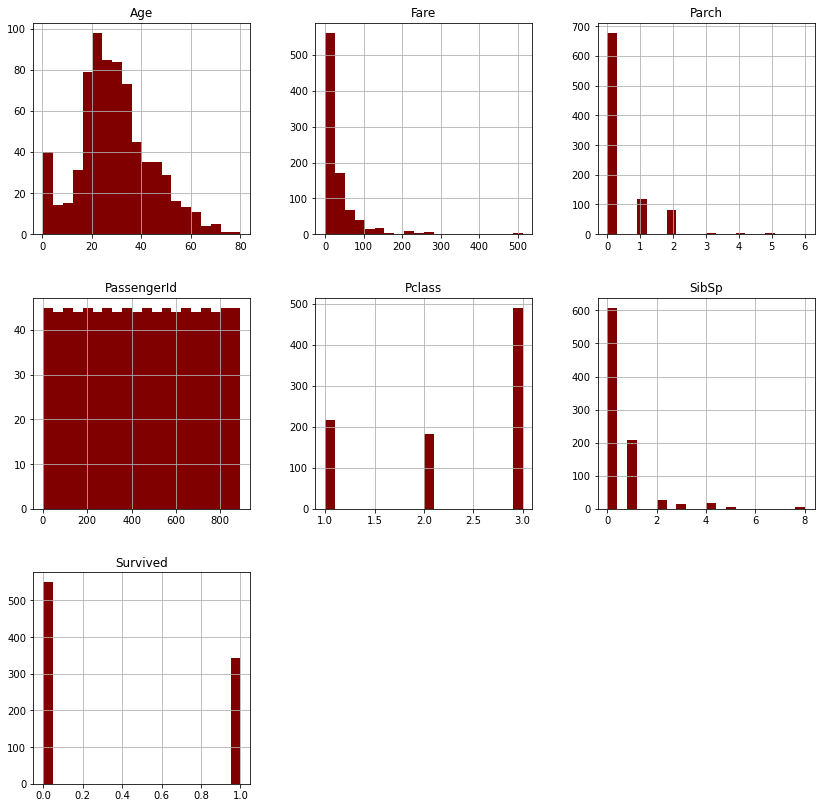

In [12]:
train.hist(figsize=(14,14),color = 'maroon',bins=20)
plt.show()

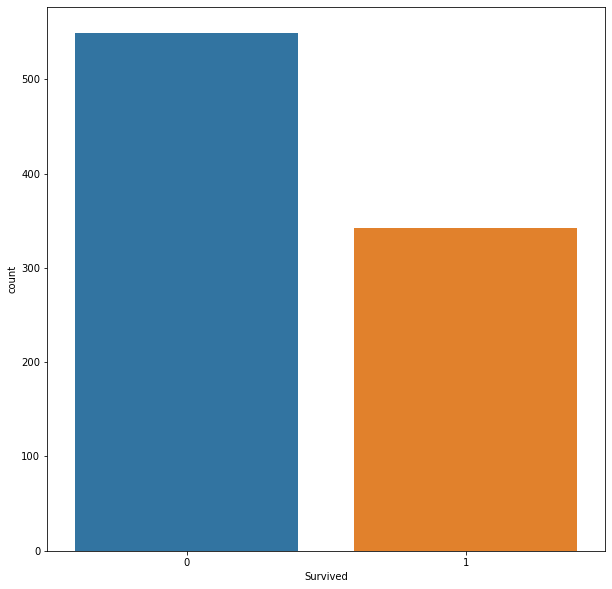

In [14]:
fig = plt.figure(figsize=(10,10))
sns.countplot(train['Survived'],data = train)

In [15]:
# Sex Visualization

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


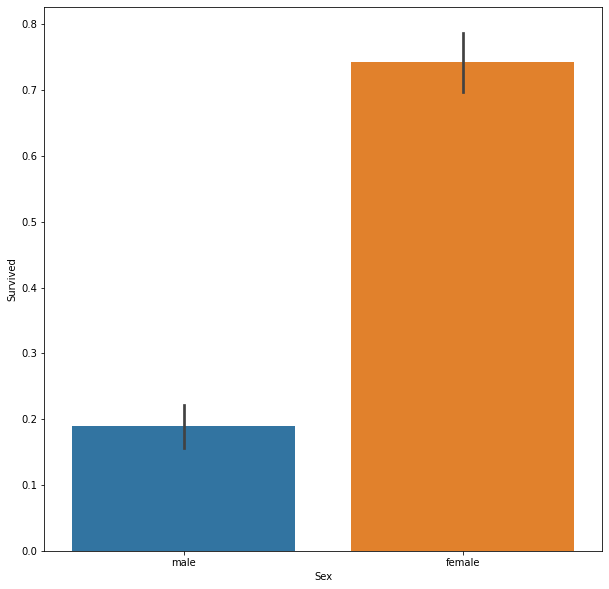

In [20]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x='Sex',y='Survived',data = train)

 # print persentage of male and female is Survived
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

In [21]:
# Pclass Vislulization

In [23]:
fig = plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

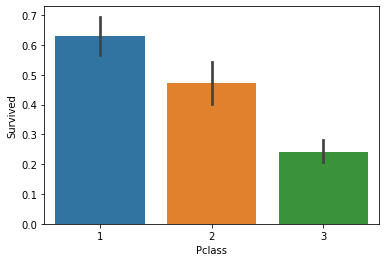

In [24]:
sns.barplot(x='Pclass',y= 'Survived',data=train)

In [25]:
print("Percentage of Pclass = 1 who survived: ",train['Survived'][train['Pclass'] == 1].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived:  62.96296296296296


In [26]:
print("Percentage of Pclass = 2 who survived: ",train['Survived'][train['Pclass'] == 2].value_counts(normalize = True)[1]*100)
print("Percentage of Pclass = 3 who survived: ",train['Survived'][train['Pclass'] == 3].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 2 who survived:  47.28260869565217
Percentage of Pclass = 3 who survived:  24.236252545824847


In [27]:
#SibSp Visualization

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


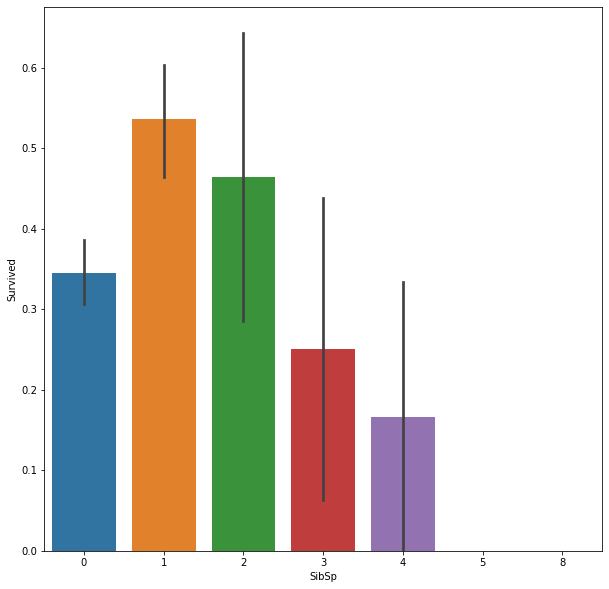

In [28]:
fig = plt.figure(figsize=(10,10))


#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

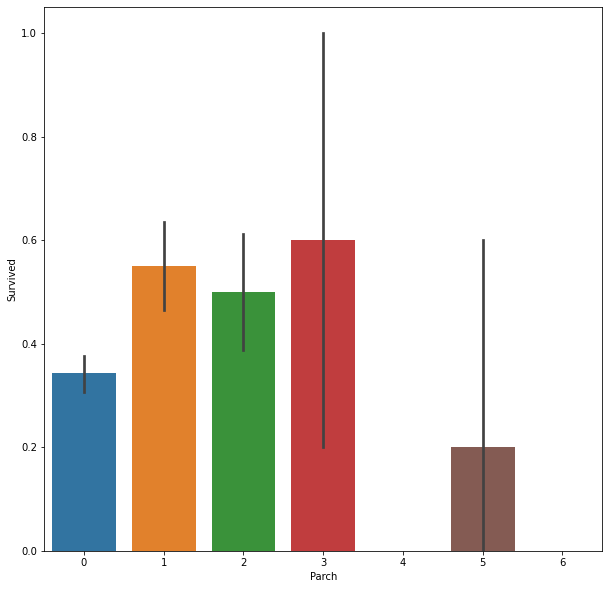

In [29]:
fig = plt.figure(figsize=(10,10))


sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

In [31]:
dataset = pd.concat([train,test],sort = False,ignore_index=True)

In [36]:
dataset.isnull().mean().sort_values(ascending = False)

Cabin          0.774637
Survived       0.319328
Age            0.200917
Embarked       0.001528
Fare           0.000764
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
dtype: float64

In [40]:
dataset.isnull().sum().sort_values(ascending = False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
Ticket            0
Parch             0
SibSp             0
Sex               0
Name              0
Pclass            0
PassengerId       0
dtype: int64

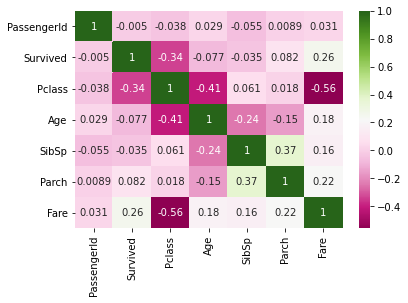

In [44]:
sns.heatmap(dataset.corr(),annot=True,cmap='PiYG')

In [45]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [82]:
dataset['Fare'].fillna(dataset['Fare'].mean(), inplace = True)
dataset['Age'].fillna(dataset['Age'].mean(), inplace = True)

In [83]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Sex               0
Age            1309
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
Title             0
FamSize           0
dtype: int64

In [78]:
dataset.Embarked.value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [48]:
dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [49]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [50]:
dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
dataset['Title'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer',
 'Dona']

In [51]:
dataset['Title'].value_counts(normalize=True)*100

Mr          57.830405
Miss        19.862490
Mrs         15.049656
Master       4.660046
Dr           0.611154
Rev          0.611154
Col          0.305577
Major        0.152788
Mlle         0.152788
Ms           0.152788
Capt         0.076394
Sir          0.076394
Lady         0.076394
Countess     0.076394
Don          0.076394
Jonkheer     0.076394
Dona         0.076394
Mme          0.076394
Name: Title, dtype: float64

In [52]:
dataset1['Title'].value_counts(normalize=True)*100

dataset1['Title'] = dataset1['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset1['Title'] = dataset1['Title'].replace('Mlle', 'Miss')
dataset1['Title'] = dataset1['Title'].replace('Ms', 'Miss')
dataset1['Title'] = dataset1['Title'].replace('Mme', 'Mrs')
    
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

dataset1['Title'] = dataset1['Title'].map(title_mapping)

# Imputing missing values with 0
dataset1['Title'] = dataset1['Title'].fillna(0)



In [53]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [60]:
dataset['Age2'] =dataset['Age'].fillna(dataset['Age'].mean(),inplace = True)

In [61]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age            1309
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
Age2           1309
dtype: int64

In [62]:
dataset.drop(['Name'], axis=1, inplace=True)

In [63]:
dataset.drop(['Cabin'], axis=1,inplace= True)

In [64]:
dataset.drop(['Age2'], axis=1,inplace= True)

In [65]:
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Sex               0
Age            1309
SibSp             0
Parch             0
Ticket            0
Fare              0
Embarked          0
Title             0
dtype: int64

In [66]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [68]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [69]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
dataset1 = pd.concat([train,test],sort = False,ignore_index=True)
dataset1.head()
dataset1.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [96]:
dataset1['Embarked'].fillna('S',inplace = True)
dataset1['Fare'].fillna(dataset1['Fare'].mean(),inplace = True)
dataset1.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [97]:
dataset1['SibSp'].corr(dataset1['Parch'])

0.37358719062649304

In [98]:
dataset1['Parch'].corr(dataset1['SibSp'])

0.37358719062649304

In [99]:
dataset1['FamSize'] = dataset1['SibSp'] + dataset1['Parch'] + 1

In [101]:
dataset1['Title'] = dataset1['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)
dataset1['Title'].unique().tolist()

['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer',
 'Dona']

In [103]:
dataset1['Title'].value_counts(normalize=True)*100

dataset1['Title'] = dataset1['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset1['Title'] = dataset1['Title'].replace('Mlle', 'Miss')
dataset1['Title'] = dataset1['Title'].replace('Ms', 'Miss')
dataset1['Title'] = dataset1['Title'].replace('Mme', 'Mrs')
    
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

dataset1['Title'] = dataset1['Title'].map(title_mapping)

# Imputing missing values with 0
dataset1['Title'] = dataset1['Title'].fillna(0)

In [104]:
dataset1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamSize,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0.0


In [105]:
dataset1.drop(['Name','Cabin','Ticket'], axis=1, inplace=True)

In [106]:
dataset1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,Title
0,1,0.0,3,male,22.0,1,0,7.2500,S,2,0.0
1,2,1.0,1,female,38.0,1,0,71.2833,C,2,0.0
2,3,1.0,3,female,26.0,0,0,7.9250,S,1,0.0
3,4,1.0,1,female,35.0,1,0,53.1000,S,2,0.0
4,5,0.0,3,male,35.0,0,0,8.0500,S,1,0.0


In [107]:
label = LabelEncoder()

In [108]:
for col in ['Sex','Embarked']:
    dataset1[col] = label.fit_transform(dataset1[col])

In [109]:
dataset1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize,Title
0,1,0.0,3,1,22.0,1,0,7.2500,2,2,0.0
1,2,1.0,1,0,38.0,1,0,71.2833,0,2,0.0
2,3,1.0,3,0,26.0,0,0,7.9250,2,1,0.0
3,4,1.0,1,0,35.0,1,0,53.1000,2,2,0.0
4,5,0.0,3,1,35.0,0,0,8.0500,2,1,0.0


In [110]:
dataset1.drop(['Title'], axis=1, inplace=True)

In [112]:
dataset1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize
0,1,0.0,3,1,22.00000,1,0,7.2500,2,2
1,2,1.0,1,0,38.00000,1,0,71.2833,0,2
2,3,1.0,3,0,26.00000,0,0,7.9250,2,1
3,4,1.0,1,0,35.00000,1,0,53.1000,2,2
4,5,0.0,3,1,35.00000,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,1,30.27259,0,0,8.0500,2,1
1305,1306,NaN,1,0,39.00000,0,0,108.9000,0,1
1306,1307,NaN,3,1,38.50000,0,0,7.2500,2,1
1307,1308,NaN,3,1,30.27259,0,0,8.0500,2,1


In [113]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [114]:
train = dataset1[:len(train)]
test = dataset1[len(train):]

In [115]:
test.drop(labels=['Survived'],axis=1,inplace=True)

C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [116]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize
891,892,3,1,34.5,0,0,7.8292,1,1
892,893,3,0,47.0,1,0,7.0000,2,2
893,894,2,1,62.0,0,0,9.6875,1,1
894,895,3,1,27.0,0,0,8.6625,2,1
895,896,3,0,22.0,1,1,12.2875,2,3


In [117]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize
0,1,0.0,3,1,22.0,1,0,7.2500,2,2
1,2,1.0,1,0,38.0,1,0,71.2833,0,2
2,3,1.0,3,0,26.0,0,0,7.9250,2,1
3,4,1.0,1,0,35.0,1,0,53.1000,2,2
4,5,0.0,3,1,35.0,0,0,8.0500,2,1


In [118]:
train['Survived'] = train['Survived'].astype(int)

C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamSize
0,1,0,3,1,22.0,1,0,7.2500,2,2
1,2,1,1,0,38.0,1,0,71.2833,0,2
2,3,1,3,0,26.0,0,0,7.9250,2,1
3,4,1,1,0,35.0,1,0,53.1000,2,2
4,5,0,3,1,35.0,0,0,8.0500,2,1


In [120]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

y=train.Survived
X=train.drop('Survived', axis=1)

In [121]:
cross_val_score(LogisticRegression(),X,y).mean()

C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

0.7778231121712385

In [122]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [136]:
model = RandomForestClassifier()

In [124]:
model

RandomForestClassifier()

In [125]:
y_pred = model.predict(X_test)

In [126]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0])

In [127]:
model.score(X_train,y_train)

1.0

In [128]:
model.score(X_test,y_test)

0.7653631284916201

In [129]:
accuracy_score(y_pred,y_test)

0.7653631284916201

In [152]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [154]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [155]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [156]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [158]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=110, max_features='sqrt', n_estimators=1000)

In [159]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [161]:
model1 = RandomForestClassifier(max_depth=110, max_features='sqrt', n_estimators=1000)

In [167]:
model1.fit(X_train,y_train)

RandomForestClassifier(max_depth=110, max_features='sqrt', n_estimators=1000)

In [168]:
model1.score(X_train,y_train)

1.0

In [169]:
model1.score(X_test,y_test)

0.776536312849162

In [163]:
y_pre = model1.predict(X_test)

In [164]:
y_pre

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1])

In [170]:
accuracy_score(y_pre,y_test)

0.7821229050279329

In [171]:
accuracy_score(y_pre,y_test)

0.7821229050279329

In [172]:


final_predictions = model1.predict(test)

output = pd.DataFrame({'PassengerId': Id, 'Survived':final_predictions})
output.to_csv('submission.csv', index=False)



In [180]:
first = output.columns[1]
first

'Survived'

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [182]:
output.drop("Id", axis = 1, inplace = True)

KeyError: "['Id'] not found in axis"

In [184]:
submission = pd.DataFrame(data=[Id,final_predictions ]).T.rename(columns={'Unnamed 0': 'Survived'})

In [185]:
submission.to_csv('submission.csv', index=False)

In [186]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
